## Import Necessary Module

Here we are reading an image from the OpenCV library. `Matplotlib` is used to plot the image.

In [1]:
import cv2
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Show Function
The Show function is specifically designed to convert color combinations. Initially, OpenCV reads colors in the BGR format, and the show function converts the BGR color combination to RGB. Finally, it returns the 'img_fix' as the result.

In [3]:
def show(root: str):
    img = cv2.imread(root)
    if img is None:
        print("Error: Unable to load image from", root)
        return None
    img_fix = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_fix)
    plt.show()
    return img_fix



## separate_color Function
`separate_color` function takes `img` as parameter. Main objective of this function is to seperate the differnt color i.e Red, Green, Blue.


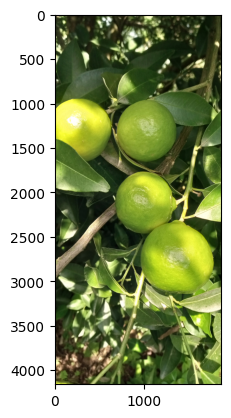

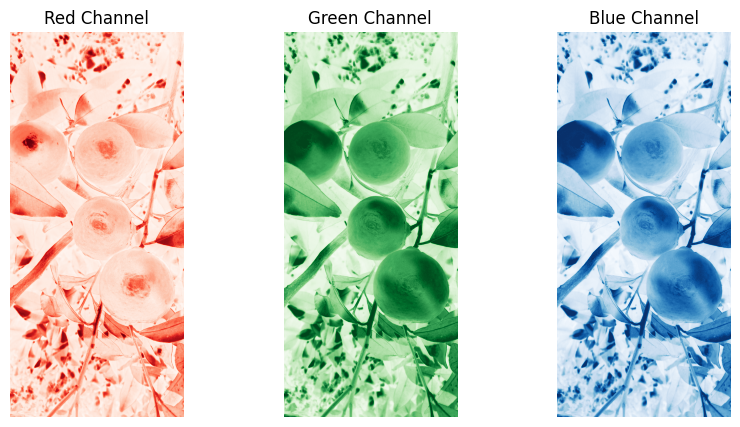

In [4]:
def separate_color(img):
    if img is None:
        print("Error: No image data to separate color.")
        return

    # Split the image into its color channels
    blue_channel = img[:,:,0]
    green_channel = img[:,:,1]
    red_channel = img[:,:,2]

    # Display each color channel separately
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(red_channel, cmap='Reds')
    plt.title('Red Channel')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(green_channel, cmap='Greens')
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(blue_channel, cmap='Blues')
    plt.title('Blue Channel')
    plt.axis('off')

    plt.show()

img = show("/content/drive/MyDrive/Orange Healthy And Infected Image Segmentation/orange1.jpg")
separate_color(img)


## Thresholding
`threshold_image()` function takes two arguments i.e image_path , threshold. The default value for thresholding is set 127. We implemented different types of thresholding such as,

**Binary Threshold:** Creates a binary image from a gray image based on the threshold values. The object target can be specified as dark or light.

**Binary Inverse:** The function of binary inverse is just opposite to binary threshold. It apply black color at target and white at background.

**Threshold Truncation:**In threshold truncation, pixel values below the threshold are left unchanged, while pixel values above the threshold are set to the threshold value itself.

**Threshold to Zero:** Threshold to Zero, pixel values below the threshold are set to zero, while pixel values above or equal to the threshold remain unchanged.

In [5]:
def threshold_image(image_path, threshold_value=127):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply different types of thresholding
    _, binary_threshold = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    _, binary_inverse = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY_INV)
    _, truncation = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TRUNC)
    _, to_zero = cv2.threshold(image, threshold_value, 255, cv2.THRESH_TOZERO)

    # Plot the original and thresholded images
    plt.figure(figsize=(10, 10))

    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.imshow(binary_threshold, cmap='gray')
    plt.title('Binary Threshold')
    plt.axis('off')

    plt.subplot(3, 2, 3)
    plt.imshow(binary_inverse, cmap='gray')
    plt.title('Binary Inverse Threshold')
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.imshow(truncation, cmap='gray')
    plt.title('Threshold Truncation')
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.imshow(to_zero, cmap='gray')
    plt.title('Threshold to Zero')
    plt.axis('off')

    plt.show()

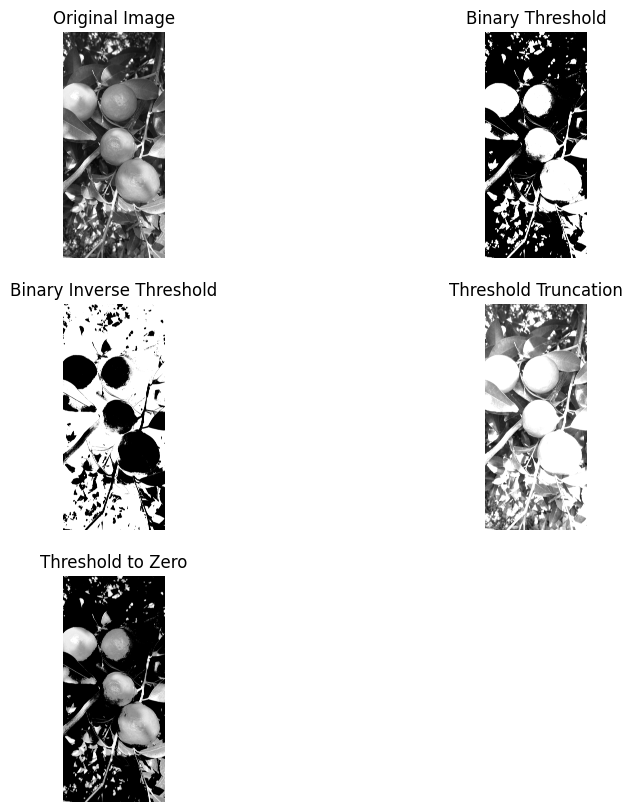

In [ ]:
threshold_image("/content/drive/MyDrive/Orange Healthy And Infected Image Segmentation/orange1.jpg")

## Image Bluring

In [6]:
img.shape

(4160, 1872, 3)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from statistics import median

def blur_image(image_path, blur_type='median', kernel_size=3):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate statistics on the blurred image
    min_value = np.min(gray_image)
    max_value = np.max(gray_image)
    mean_value = np.mean(gray_image)
    median_value = median(gray_image.flatten())

    # Apply the specified blur type
    if blur_type == 'median':
        blurred_image = cv2.medianBlur(gray_image, kernel_size)
    elif blur_type == 'mean':
        blurred_image = cv2.blur(gray_image, (kernel_size, kernel_size))
    else:
        raise ValueError("Invalid blur type. Choose 'median' or 'mean'.")

    # Show the original and blurred images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(blurred_image)
    plt.title('Blurred Image')
    plt.axis('off')

    plt.show()

    # Print the calculated statistics
    print("Minimum Pixel Value:", min_value)
    print("Maximum Pixel Value:", max_value)
    print("Average Pixel Value:", mean_value)
    print("Median Pixel Value:", median_value)



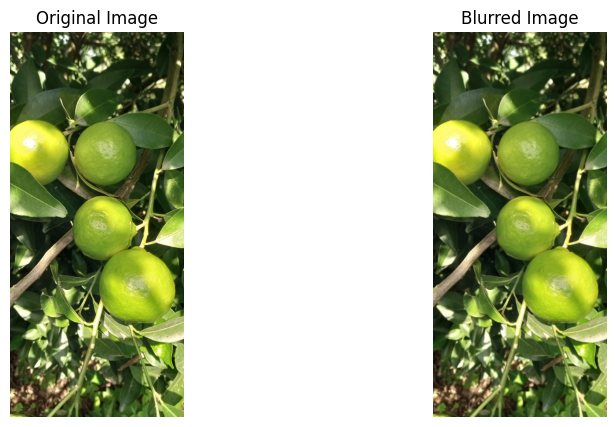

Minimum Pixel Value: 0
Maximum Pixel Value: 255
Average Pixel Value: 87.66708575601304
Median Pixel Value: 64.0


In [8]:
blur_image("/content/drive/MyDrive/Orange Healthy And Infected Image Segmentation/orange1.jpg", "mean", 9)

## Change Image into HSV

In [14]:
def plot_images_in_hsv(img_path1, img_path2):

    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)


    img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
    img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)


    fig, axs = plt.subplots(2, 2, figsize=(5, 5))


    axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Image 1 (Original)')


    axs[0, 1].imshow(cv2.cvtColor(img1_hsv, cv2.COLOR_HSV2RGB))
    axs[0, 1].set_title('Image 1 (HSV)')


    axs[1, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title('Image 2 (Original)')


    axs[1, 1].imshow(cv2.cvtColor(img2_hsv, cv2.COLOR_HSV2RGB))
    axs[1, 1].set_title('Image 2 (HSV)')


    plt.tight_layout()


    plt.show()



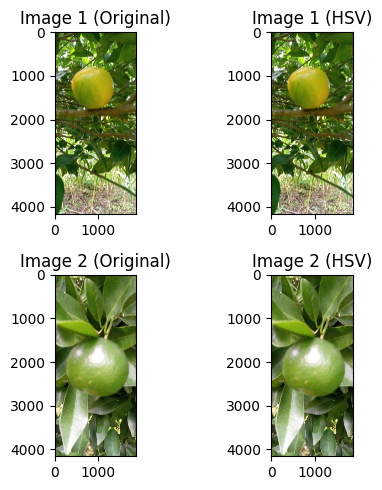

In [15]:
img_path1 = "/content/drive/MyDrive/Orange Healthy And Infected Image Segmentation/orange2.jpg"
img_path2 = "/content/drive/MyDrive/Orange Healthy And Infected Image Segmentation/orange3.jpg"

plot_images_in_hsv(img_path1, img_path2)

